In [36]:
import numpy as np
import pandas as pd
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [37]:
train = pd.read_csv('train.csv')
data = train.drop(['ID'],axis = 1)

<Axes: xlabel='UA1', ylabel='Density'>

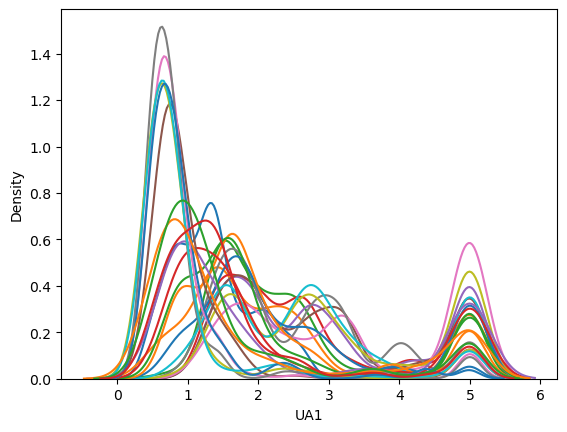

In [38]:

sns.kdeplot(data['UA1'])
sns.kdeplot(data['UA2'])
sns.kdeplot(data['UA3'])
sns.kdeplot(data['UA4'])
sns.kdeplot(data['UA5'])
sns.kdeplot(data['UA6'])
sns.kdeplot(data['UA7'])
sns.kdeplot(data['UA8'])
sns.kdeplot(data['UA9'])
sns.kdeplot(data['UA10'])
sns.kdeplot(data['UA11'])
sns.kdeplot(data['UA12'])
sns.kdeplot(data['UA13'])
sns.kdeplot(data['UA14'])
sns.kdeplot(data['UA15'])
sns.kdeplot(data['UA16'])
sns.kdeplot(data['UA17'])
sns.kdeplot(data['UA18'])
sns.kdeplot(data['UA19'])
sns.kdeplot(data['UA20'])
sns.kdeplot(data['UA21'])
sns.kdeplot(data['UA22'])
sns.kdeplot(data['UA23'])
sns.kdeplot(data['UA24'])



<Axes: xlabel='UA1', ylabel='Density'>

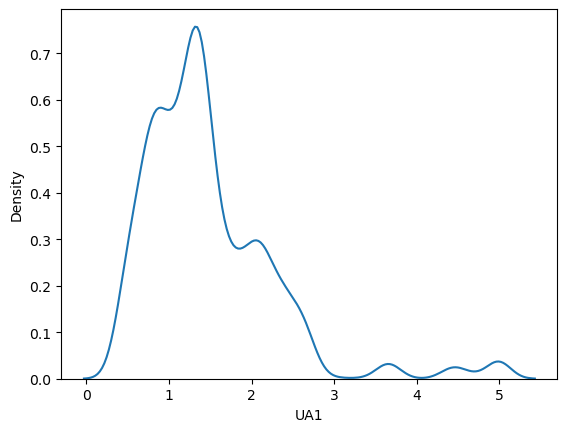

In [39]:

sns.kdeplot(data['UA1'])

<Axes: xlabel='UA2', ylabel='Density'>

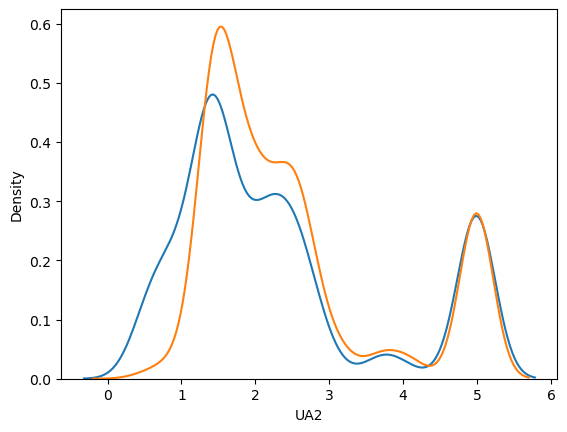

In [40]:
sns.kdeplot(data['UA2'])
sns.kdeplot(data['UA3'])


<Axes: xlabel='UA5', ylabel='Density'>

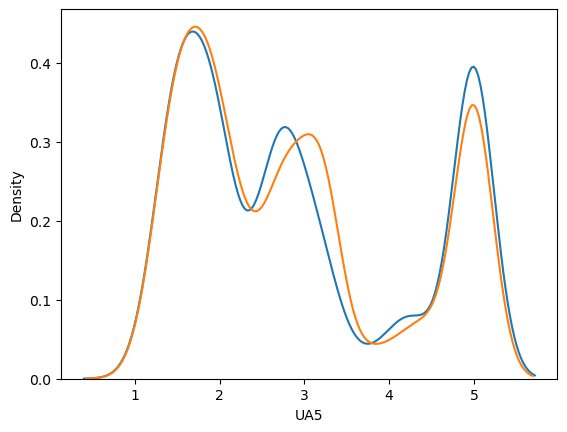

In [41]:


sns.kdeplot(data['UA5'])
sns.kdeplot(data['UA6'])



<Axes: xlabel='UA7', ylabel='Density'>

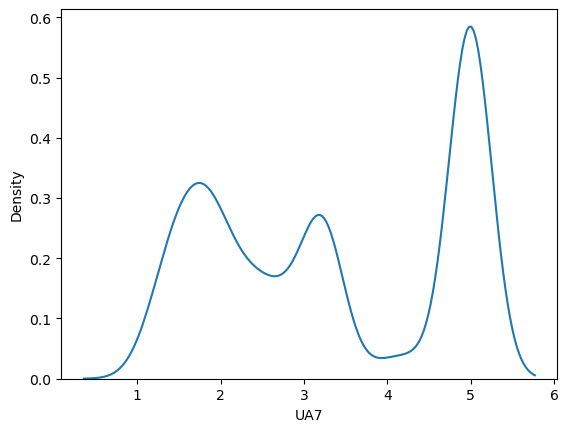

In [42]:
sns.kdeplot(data['UA7'])

<Axes: xlabel='UA8', ylabel='Density'>

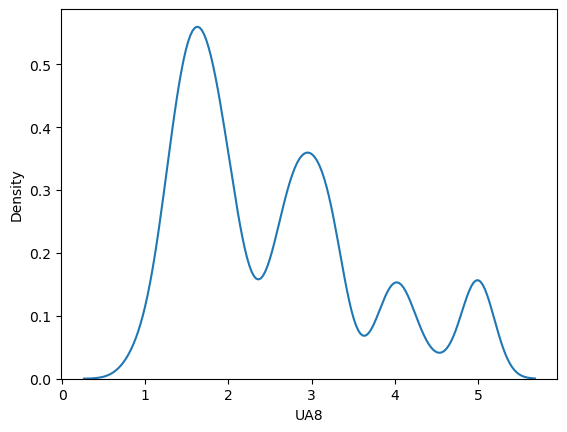

In [43]:
sns.kdeplot(data['UA8'])

<Axes: xlabel='UA9', ylabel='Density'>

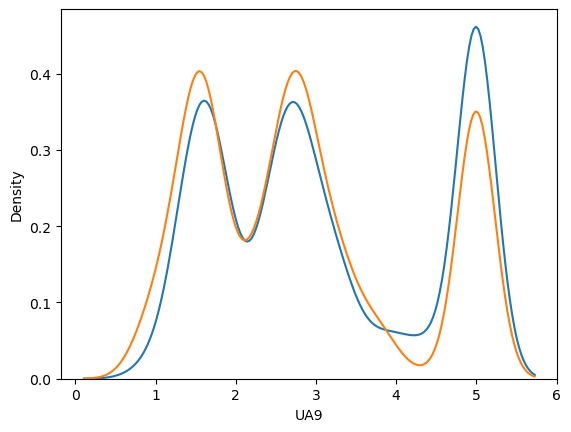

In [44]:

sns.kdeplot(data['UA9'])
sns.kdeplot(data['UA10'])

<Axes: xlabel='UA11', ylabel='Density'>

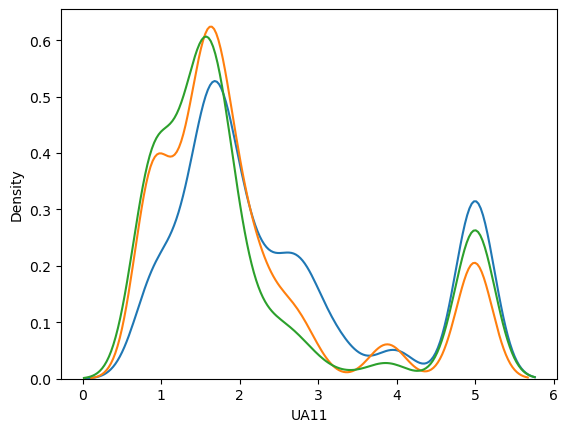

In [45]:
sns.kdeplot(data['UA11'])
sns.kdeplot(data['UA12'])
sns.kdeplot(data['UA13'])

<Axes: xlabel='UA14', ylabel='Density'>

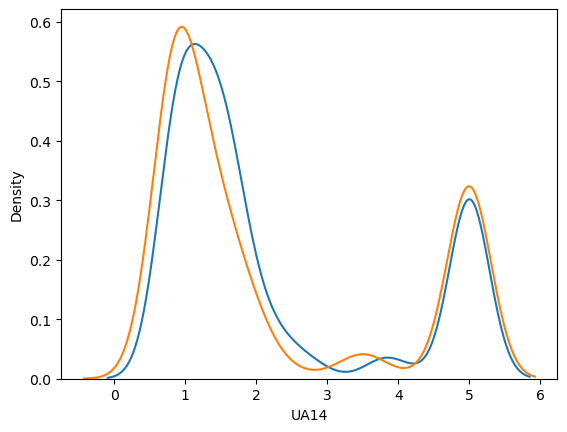

In [46]:


sns.kdeplot(data['UA14'])
sns.kdeplot(data['UA15'])

<Axes: xlabel='UA16', ylabel='Density'>

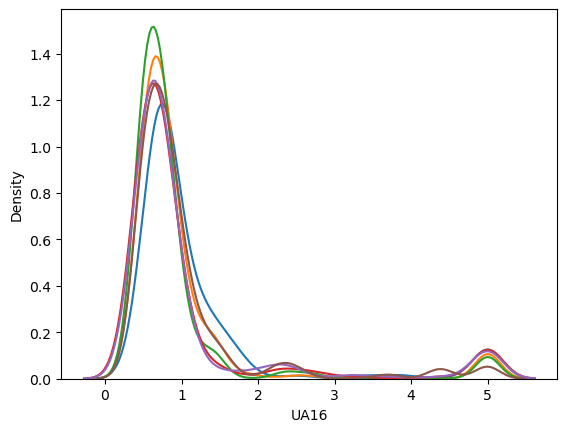

In [47]:
sns.kdeplot(data['UA16'])
sns.kdeplot(data['UA17'])
sns.kdeplot(data['UA18'])
sns.kdeplot(data['UA19'])
sns.kdeplot(data['UA20'])
sns.kdeplot(data['UA21'])

<Axes: xlabel='UA22', ylabel='Density'>

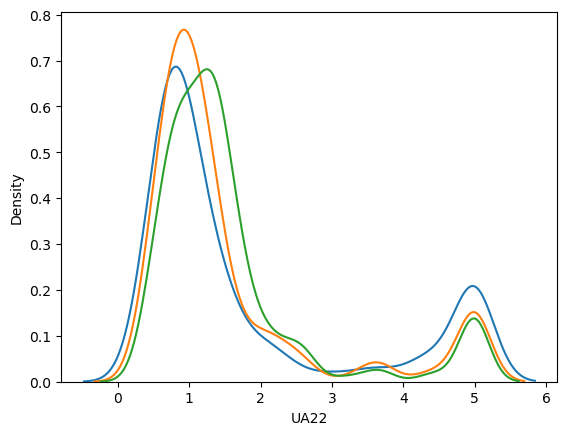

In [48]:
sns.kdeplot(data['UA22'])
sns.kdeplot(data['UA23'])
sns.kdeplot(data['UA24'])

In [49]:
def FE(df: pd.DataFrame) -> pd.DataFrame:

    eli = ['UA1', 'UA2', 'UA3', 'UA4', 'UA5', 'UA6', 'UA7', 'UA8', 'UA9', 'UA10', 'UA11', 'UA12', 'UA13', 'UA14', 'UA15', 'UA16', 'UA17', 'UA18', 'UA19', 'UA20', 'UA21', 'UA22', 'UA23', 'UA24'];

    df["X1"] = np.array(list(df["UA1"]))
    df["X2"] = (np.array(list(df["UA2"])) + np.array(list(df["UA3"])))*2
    df["X3"] = (np.array(list(df["UA4"])) + np.array(list(df["UA5"])) + np.array(list(df["UA6"]))+np.array(list(df["UA7"])))*3
    df["X4"] = np.array(list(df["UA7"]))
    df["X4"] = np.array(list(df["UA8"]))
    df["X5"] = (np.array(list(df["UA9"])) + np.array(list(df["UA10"])))*2
    df["X6"] = (np.array(list(df["UA11"])) + np.array(list(df["UA12"])) + np.array(list(df["UA13"])))*3
    df["X7"] = (np.array(list(df["UA14"])) + np.array(list(df["UA15"])))*2
    df["X8"] = (np.array(list(df["UA16"])) + np.array(list(df["UA17"])) + np.array(list(df["UA18"])) + np.array(list(df["UA19"])) + np.array(list(df["UA20"])) + np.array(list(df["UA21"])))*6
    df["X9"] = (np.array(list(df["UA22"])) + np.array(list(df["UA23"])) + np.array(list(df["UA24"])))*3

    df = df.loc[:, ~df.columns.isin(eli)]
    return df
#1,7,8 제외 시 가장 높음
                    

In [50]:
FE(data)

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,0.438,8.246,49.689,2.351,9.950,15.249,6.922,17.808,3.939
1,0.438,8.246,49.698,2.637,9.962,15.231,6.928,17.826,3.948
2,0.438,8.246,49.641,2.637,9.954,15.234,6.922,17.832,3.957
3,0.437,8.252,49.632,2.353,9.952,15.336,6.922,17.832,3.951
4,0.438,8.248,49.641,2.640,9.946,15.234,6.922,17.826,3.942
...,...,...,...,...,...,...,...,...,...
5451,0.910,17.994,31.680,1.087,5.624,10.098,12.570,52.176,34.686
5452,0.926,18.030,29.724,1.071,5.566,9.954,4.320,37.248,33.255
5453,0.937,18.068,29.724,1.053,5.508,9.198,4.238,52.374,33.315
5454,0.945,16.208,29.394,1.034,5.452,9.003,12.454,52.392,33.354


In [51]:
#caler = MinMaxScaler()
#scaled_data = scaler.fit_transform(data)
model = KMeans(n_clusters=3, random_state=0, init='k-means++')

prediction = model.fit_predict(data)

c:\Users\kkomy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [52]:
df = pd.DataFrame({'ID': train['ID'], 'label' : prediction})
df.to_csv('submission2.csv', index=False)